### EDA Telecomunicaiones Starlink

#### Bienvenidos al notebook de analisis exploratorio! Como se explica tambien en el README este analisis se realiza con el objetivo de explorar y profundizar la informacion aportada por el ENACOM. Siendo un analista de datos que forma parte de la empresa Starlink, la idea es encontrar el nicho donde dicha empresa pueda expandirse en la Argentina con su innovador servicio de internet satelital, por lo cual es importante toda informacion relacionada al estudio de mercado es relevante

#### Comenzamos con el EDA importando librerias que son de utilidad para este procedimiento, tambien libreriras basicas como el pandas y numpy para manipular los datos junto con una libreria de warnings para evitar mensajes de advertencia en las respuestas

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

#### Descargamos y leemos el excel para trabajar con las hojas contenidas en el archivo

In [2]:
excel = r'C:\Users\rubio\Documents\SoyHenry\Proyecto_Individual\Internet.xlsx'

In [3]:
vel_prov = pd.read_excel(excel, sheet_name= 'Velocidad % por prov')
totales_vmd = pd.read_excel(excel, sheet_name= 'Totales VMD')
tot_tec = pd.read_excel(excel, sheet_name= 'Totales Accesos Por Tecnología')
acc_tec = pd.read_excel(excel, sheet_name= 'Accesos Por Tecnología')
p_pob = pd.read_excel(excel, sheet_name= 'Penetración-poblacion')
p_hog = pd.read_excel(excel, sheet_name= 'Penetracion-hogares')
acc_vel = pd.read_excel(excel, sheet_name= 'Accesos por velocidad')
ingr = pd.read_excel(excel, sheet_name= 'Ingresos ')

#### Simepre comenzamos explorando el dataframe mostrando las primeras lineas para ver su estructura basica, luego se busca graficar para observar mas en detalle los datos

In [4]:
vel_prov.head() # Velocidad % por prov

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50


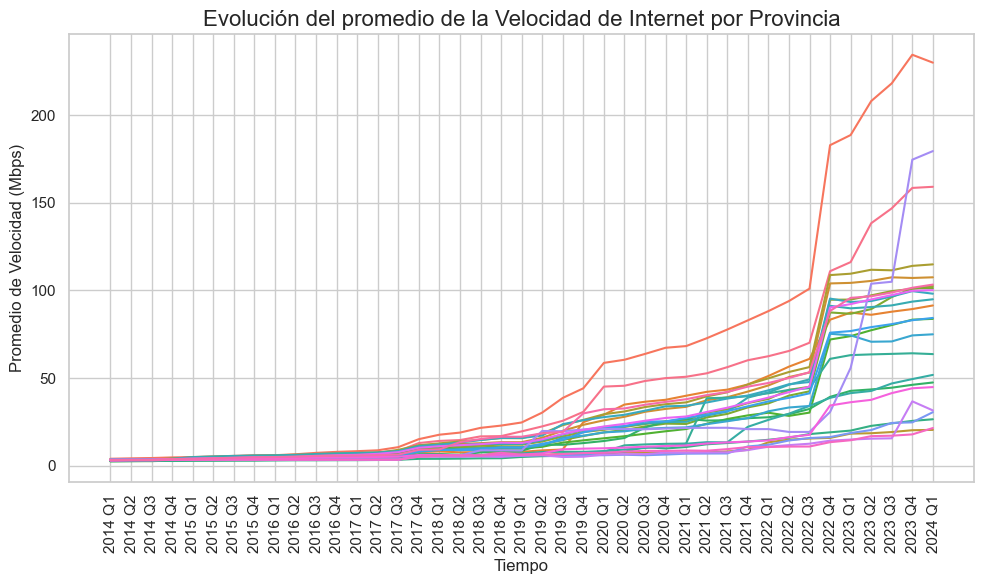

In [59]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# Creamos una nueva columna para representar el tiempo (año y trimestre juntos)
vel_prov['Tiempo'] = vel_prov['Año'].astype(str) + " Q" + vel_prov['Trimestre'].astype(str)

# Graficamos en funcion del tiempo, dibujando una línea por cada provincia y despues le agregamos el titulo y las etiquetas
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.lineplot(x='Tiempo', y='Mbps (Media de bajada)', hue='Provincia', data=vel_prov, legend= False)

# Para mostrar la leyenda se elimina 'legend=False' y se debe agregar 'plt.legend(title="Provincia")' si se quiere visualizar las provincias

plt.gca().invert_xaxis()
plt.title('Evolución del promedio de la Velocidad de Internet por Provincia', fontsize=16)
plt.xlabel('Tiempo', fontsize=12)
plt.ylabel('Promedio de Velocidad (Mbps)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Por lo que podemos observar que hay un gran salto positivo en el promedio de velocidad en la mayoria de las provincias en el ultimo trimestre del 2022, ahora visualizaremos en funcion de las provincias para analizar mejor las dimensiones de la conectividad en ellas

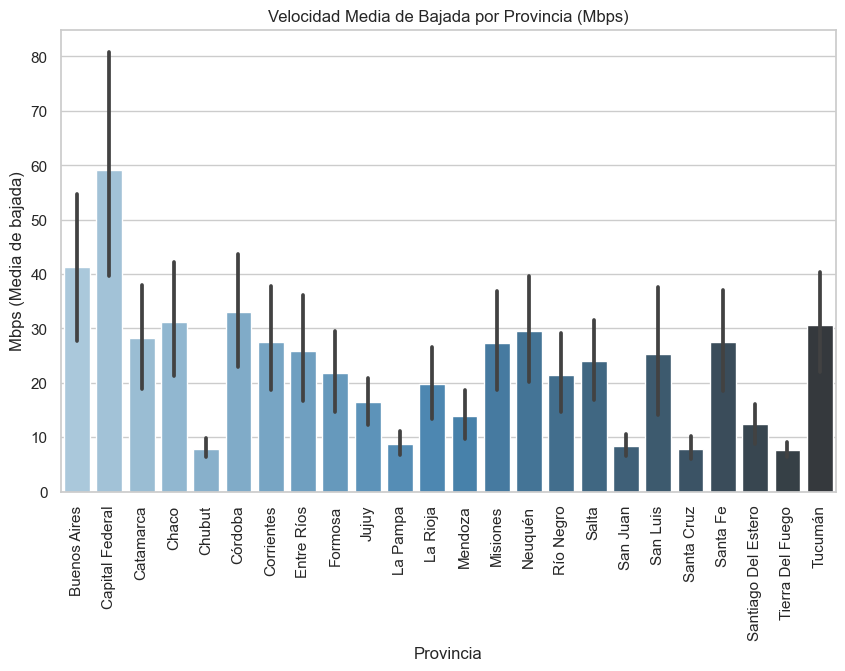

In [6]:
# Hacemos un grafico de barras para analizar de forma categorica la velocidad media en cada provincia

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=vel_prov, palette='Blues_d')
plt.title('Velocidad Media de Bajada por Provincia (Mbps)')
plt.xticks(rotation=90)
plt.show()

#### Aca podemos observar como algunas provincias quedaron atras en el salto tecnologico por razones desconocidas pero aun asi es un dato geograficamente relevante

#### Pasamos a analizar el dataframe que explica las distintas tecnologias en funcion del tiempo

In [65]:
tot_tec.head() # Totales Accesos Por Tecnología

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
1,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
2,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
3,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023
4,2023,1,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023


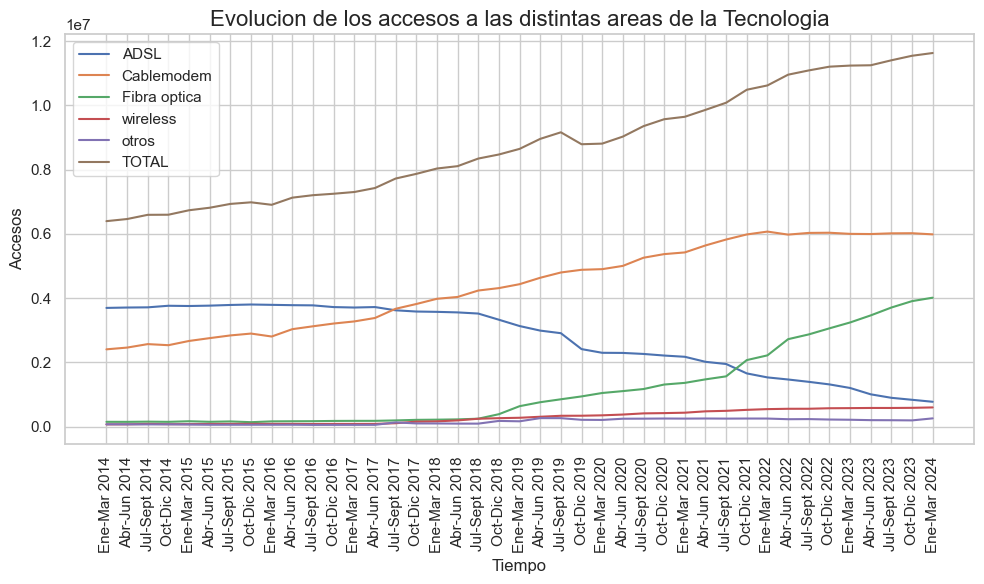

In [63]:
# Graficamos cada una de las tecnologias, colocando la cantidad de accesos en el eje Y y en el eje X usamos la columna 'Periodo'

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.lineplot(x='Periodo', y='ADSL', data=tot_tec, label='ADSL')
sns.lineplot(x='Periodo', y='Cablemodem', data=tot_tec, label='Cablemodem')
sns.lineplot(x='Periodo', y='Fibra óptica', data=tot_tec, label='Fibra optica')
sns.lineplot(x='Periodo', y='Wireless', data=tot_tec, label='wireless')
sns.lineplot(x='Periodo', y='Otros', data=tot_tec, label='otros')
sns.lineplot(x='Periodo', y='Total', data=tot_tec, label='TOTAL')

plt.gca().invert_xaxis()

plt.title('Evolucion de los accesos a las distintas areas de la Tecnologia', fontsize=16)
plt.xlabel('Tiempo', fontsize=12)
plt.ylabel('Accesos', fontsize=12)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### En el grafico de arriba se puede observar la suavidad de las lineas explicando la baja gradualidad de cambio en las nuevas conexiones, que justifica la nula participacion que tiene en el cambio radical observado en el grafico de velocidades de conexion, lo cual el salto fue generado por el aumento en el consumo de conectividad en conexiones ya existentes

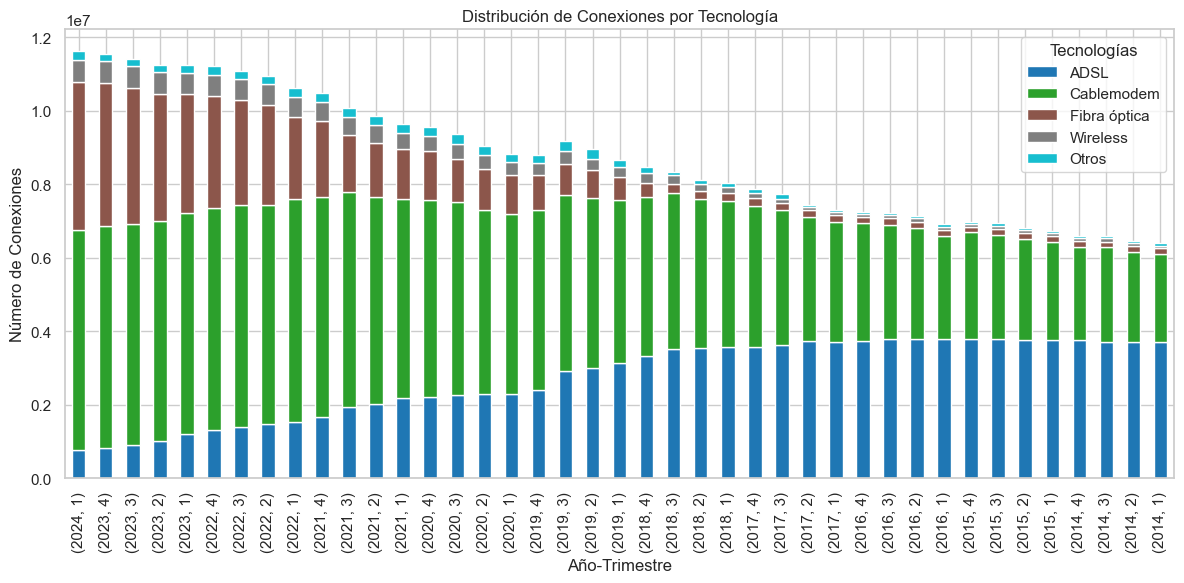

In [72]:
tot_tec.set_index(['Año', 'Trimestre'])[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab10')
plt.title('Distribución de Conexiones por Tecnología')
plt.ylabel('Número de Conexiones')
plt.xlabel('Año-Trimestre')
plt.xticks(rotation=90)
plt.legend(title='Tecnologías')
plt.tight_layout()
plt.show()

#### El grafico mostrado se puede ver mejor las proporciones entre las distintas tecnologias, dando lugar a la evidencia que con el tiempo ciertas tecnologias (ADSL) desaparecen dejando lugar a otras mas modernas (Fibra optica) mientras que otras permanecen casi intactas (Cablemodem)

#### El siguiente dataframe es muy similar al anterior pero con la diferencia que ahora entra en juego las provincias, por lo cual inspeccionaremos el aspecto geografico de las tecnologias

In [58]:
acc_tec.head(5) # Accesos Por Tecnología

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Fecha
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0,2024 Q1
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0,2024 Q1
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0,2024 Q1
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0,2024 Q1
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0,2024 Q1


C:\Users\rubio\AppData\Local\Temp\ipykernel_54064\3267462461.py:24: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.



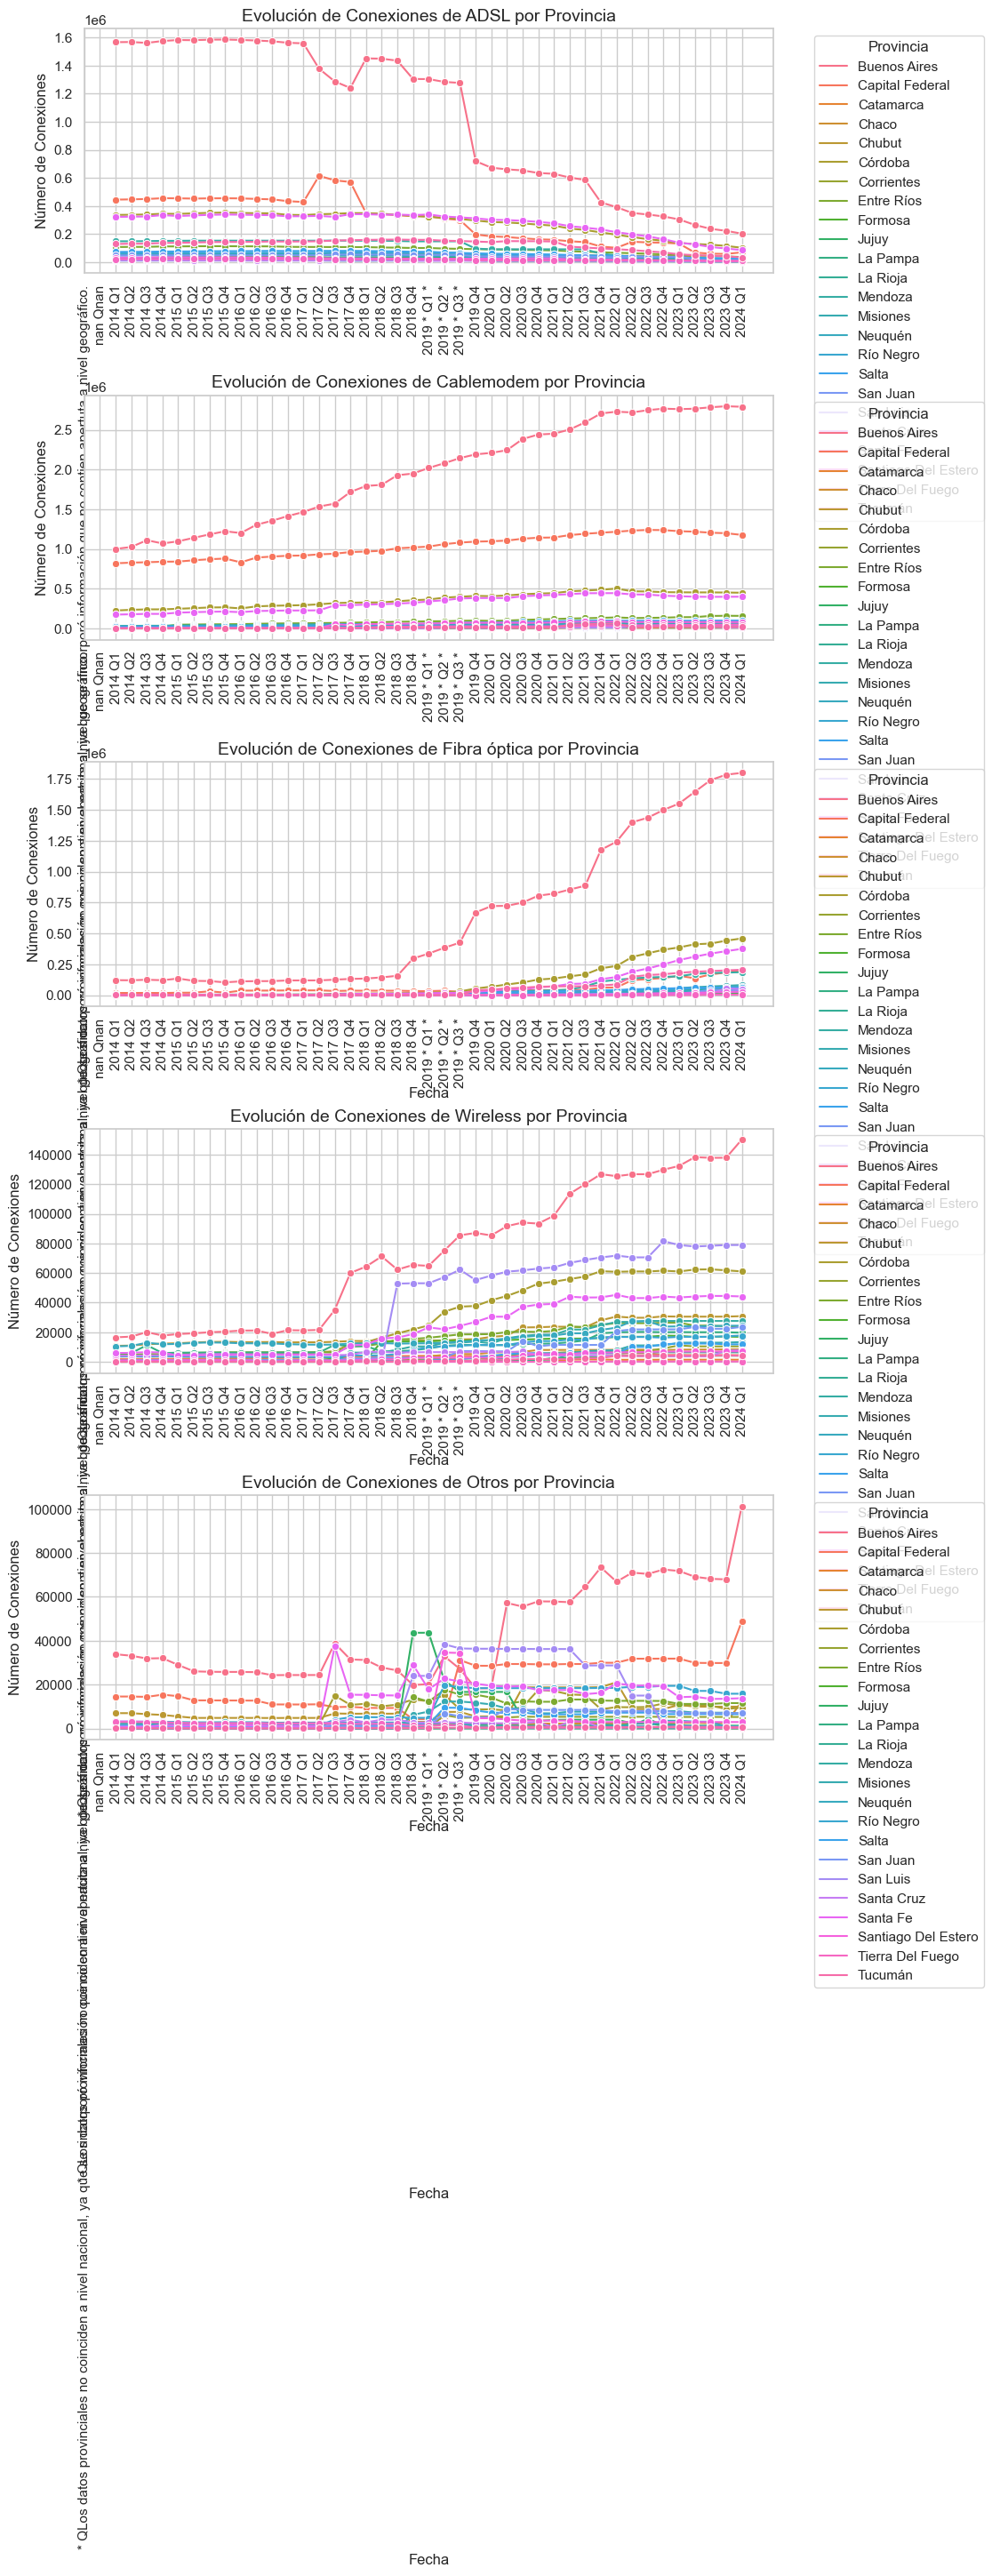

In [81]:
# Graficamos las distintas tecnologias en funcion del tiempo para cada provincia

acc_tec['Fecha'] = acc_tec['Año'].astype(str) + " Q" + acc_tec['Trimestre'].astype(str)

tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

sns.set(style="whitegrid")

fig, axs = plt.subplots(nrows=len(tecnologias), figsize=(10, 25))

for i, tecnologia in enumerate(tecnologias):
    sns.lineplot(x='Fecha', y=tecnologia, hue='Provincia', data=acc_tec, ax=axs[i], marker='o')
    axs[i].set_title(f'Evolución de Conexiones de {tecnologia} por Provincia', fontsize=14)
    axs[i].set_xlabel('Fecha', fontsize=12)
    axs[i].set_ylabel('Número de Conexiones', fontsize=12)
    axs[i].tick_params(axis='x', rotation=90)
    axs[i].legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
    axs[i].invert_xaxis()

plt.tight_layout()

plt.subplots_adjust(hspace=0.5)

plt.show()

#### Mas alla de que el grafico esté desprolijo, vemos mucha informacion la cual vamos a mencionar punto por punto:
####    1. En el primer grafico (ADLS) se muestran cambios ppalmente en la provincia porteña y la capital, donde ocurren pequeños vaivenes que terminan finalmente en una caida,   un movimiento esperado dado los analisis anteriores 
####    2. En el segundo grafico (cablemodem) tambien tiene detalles normales en relacion al lento y constante crecimiento de esta tecnologia sobre todo en las zonas mas pobladas como BsAs, Cordoba y Santa Fe 
####    3. Lo mismo en el grafico de fibra optica que marca un acelerado crecimiento pero resaltando a la provincia de BsAs sobre las demas
####    4. En el caso de las conexiones inalambricas podemos observar un crecimiento repentino seguido de un estancamiento 

#### En esta parte nos metemos de lleno en dos dataframes que describen las conexiones de forma demografica: uno en relacion a los habitantes y otro en relacion a los hogares. Los cuales presentamos a continuacion

In [82]:
p_pob.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Tiempo
0,2024,1,Buenos Aires,27.80,2024 Q1
1,2024,1,Capital Federal,48.78,2024 Q1
2,2024,1,Catamarca,17.50,2024 Q1
3,2024,1,Chaco,12.48,2024 Q1
4,2024,1,Chubut,26.02,2024 Q1


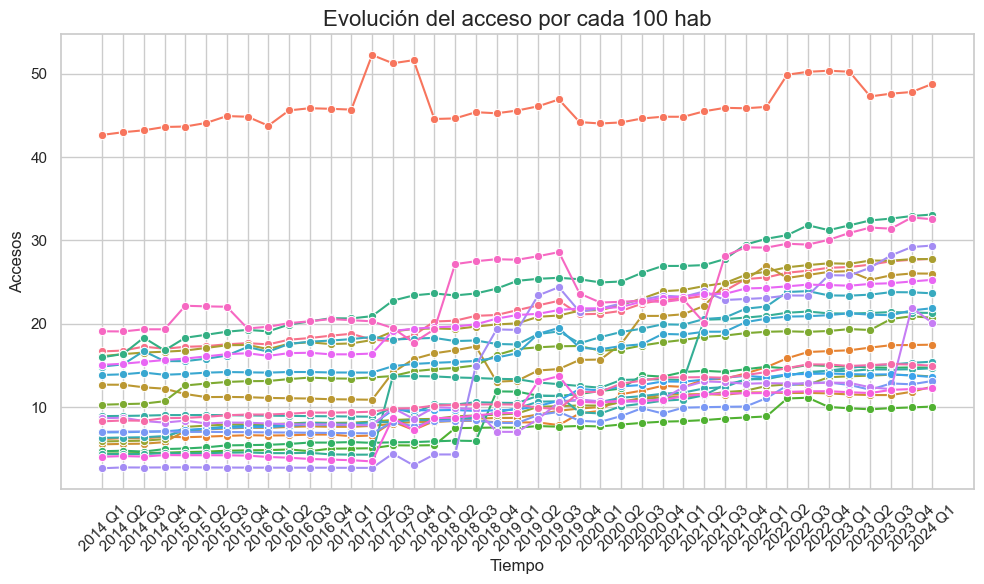

In [15]:
p_pob['Tiempo'] = p_pob['Año'].astype(str) + " Q" + p_pob['Trimestre'].astype(str)

plt.figure(figsize=(10, 6))

sns.set(style="whitegrid")
sns.lineplot(x='Tiempo', y='Accesos por cada 100 hab', hue='Provincia', data=p_pob, marker="o", legend=False)

plt.gca().invert_xaxis()
plt.title('Evolución del acceso por cada 100 hab', fontsize=16)
plt.xlabel('Tiempo', fontsize=12)
plt.ylabel('Accesos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
p_hog.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


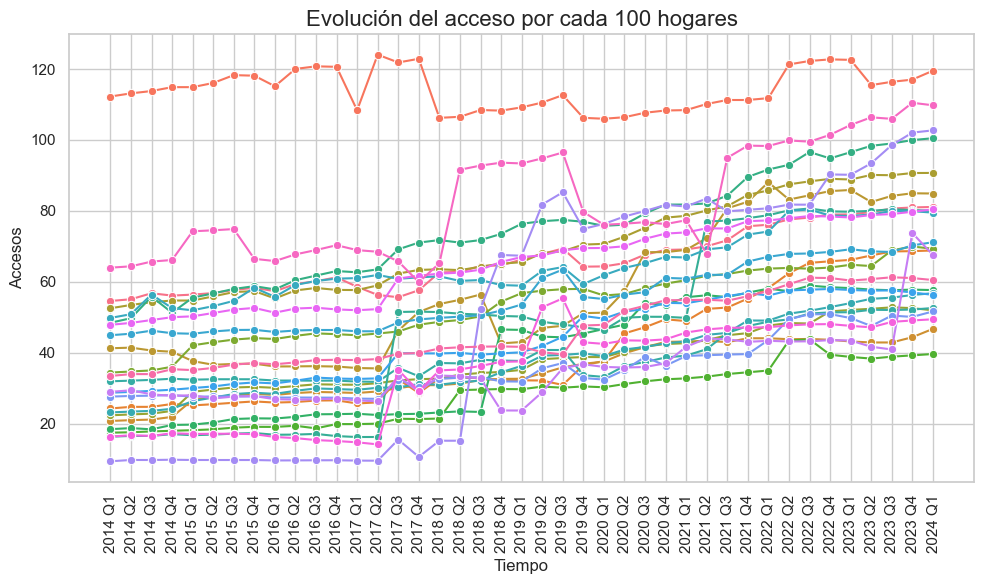

In [83]:
p_hog['Tiempo'] = p_hog['Año'].astype(str) + " Q" + p_hog['Trimestre'].astype(str)

plt.figure(figsize=(10, 6))

sns.set(style="whitegrid")
sns.lineplot(x='Tiempo', y='Accesos por cada 100 hogares', hue='Provincia', data=p_hog, marker="o", legend=False)

plt.gca().invert_xaxis()
plt.title('Evolución del acceso por cada 100 hogares', fontsize=16)
plt.xlabel('Tiempo', fontsize=12)
plt.ylabel('Accesos', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Ambos graficos demuestran que son un calco uno del otro salvo por sus diferencias en las dimensiones, y ambos poseen una infinidad de cambios abruptos que parecieran fruto del azar. Pero aportan algo mucho mas valioso, y es que todas las provincias parecen estar en la misma sintonia de crecimiento comunicando una situacion de consumo similar entre ellas, como si dejaran las diferencias de cualquier fenomeno socio-economico de lado

#### A continuacion hacemos merge de ambos dataframes para generar otro punto de vista comparativo, esta vez entre provincias

In [18]:
df_pob = pd.concat([p_pob, p_hog[['Accesos por cada 100 hogares']]], axis=1)
df_pob.drop(columns= 'Tiempo', inplace=True)
df_pob.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,27.80,81.10
1,2024,1,Capital Federal,48.78,119.53
2,2024,1,Catamarca,17.50,68.82
3,2024,1,Chaco,12.48,46.70
4,2024,1,Chubut,26.02,84.89


In [19]:
df_pob2 = df_pob.drop(columns={'Año','Trimestre'}, axis=1)
df_pob2 = df_pob2.groupby('Provincia')[['Accesos por cada 100 hab','Accesos por cada 100 hogares']].mean()
df_pob2.head()

,Accesos por cada 100 hab,Accesos por cada 100 hogares
Provincia,,
Buenos Aires,21.448418,65.966736
Capital Federal,46.149186,114.195494
Catamarca,10.310059,40.540078
Chaco,9.286249,34.754929
Chubut,17.446575,56.941384


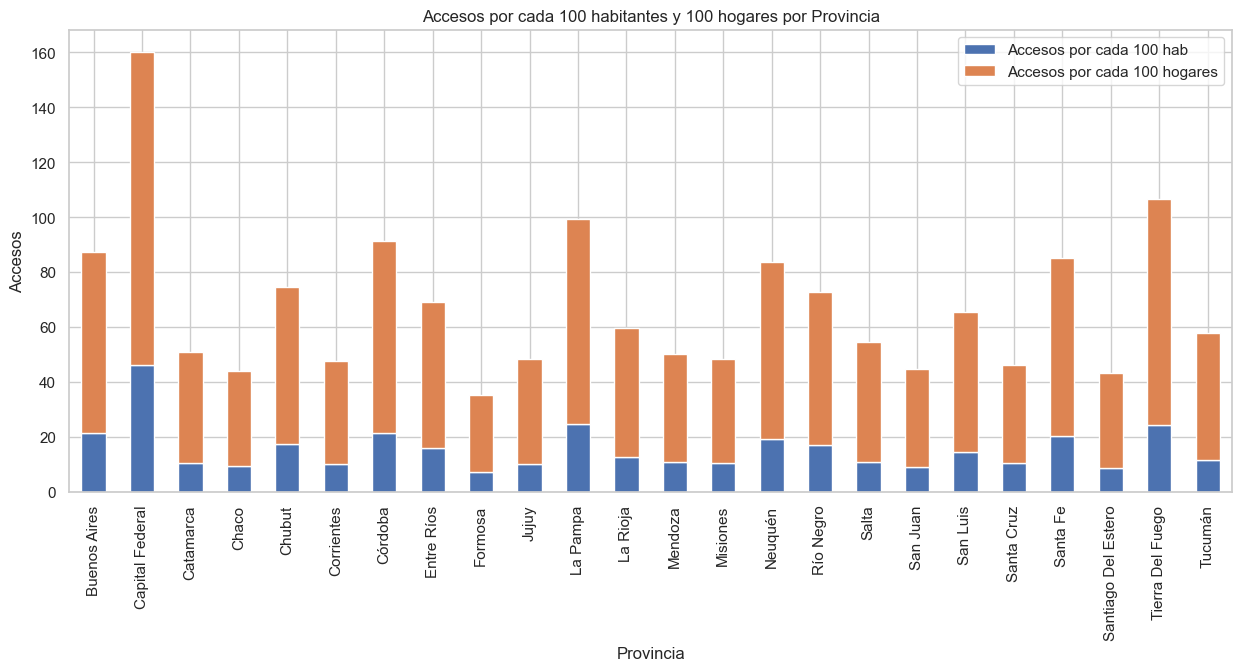

In [20]:
df_pob2.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Accesos por cada 100 habitantes y 100 hogares por Provincia')
plt.xticks(rotation=90)
plt.ylabel('Accesos')
plt.show()

#### Como podemos ver, este grafico aclara lo mas evidente: hay mas conexiones en los hogares que por habitante, un aspecto clave en la economia familiar que nunca se debe pasar por alto

#### A continuacion evaluaremos los distintos rangos de velocidades en funcion del tiempo y de las provincias

In [21]:
acc_vel.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,1,Buenos Aires,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0,5044557.0
1,2024,1,Capital Federal,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0,1504711.0
2,2024,1,Catamarca,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70.0,74933.0
3,2024,1,Chaco,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816.0,155543.0
4,2024,1,Chubut,111.0,1083.0,43828.0,31885.0,23024.0,20261.0,33844.0,16640.0,170676.0


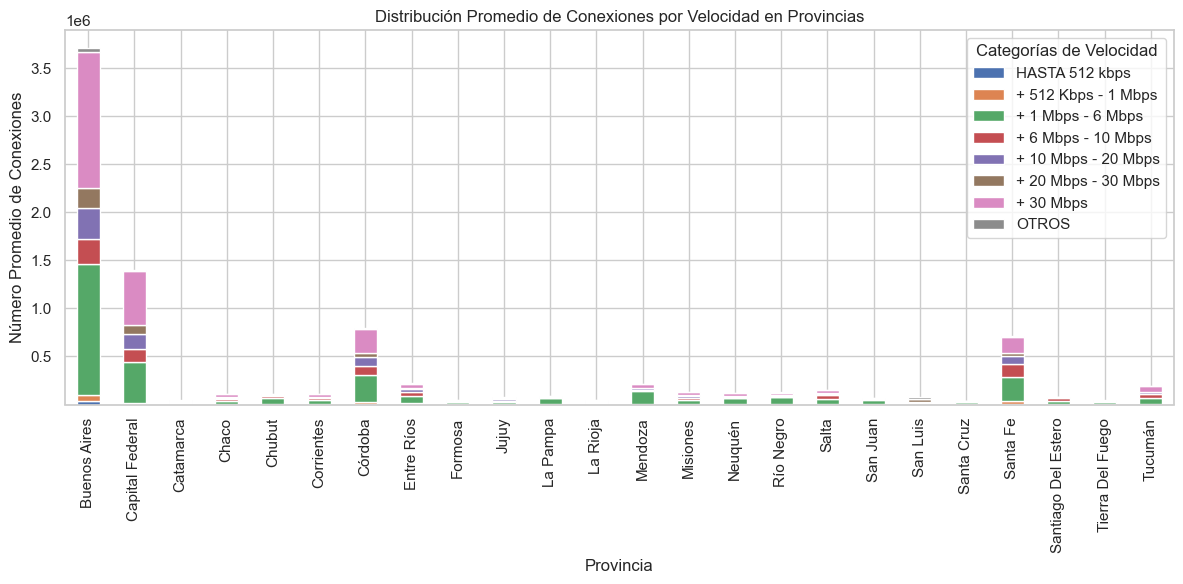

In [55]:
# Agrupamos por Provincia y calculamos el promedio de las columnas numéricas, asi es mas sencillo graficar
acc_vel2 = acc_vel.groupby('Provincia').mean(numeric_only=True).reset_index()

# Establecemos la provincia como índice y eliminamos las columnas que no utilizaremos
acc_vel2.set_index('Provincia', inplace=True)
acc_vel2.drop(columns=['Año', 'Trimestre', 'Total']).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución Promedio de Conexiones por Velocidad en Provincias')
plt.ylabel('Número Promedio de Conexiones')
plt.xlabel('Provincia')
plt.xticks(rotation=90)
plt.legend(title='Categorías de Velocidad')
plt.tight_layout()
plt.show()

#### Analizando el grafico se puede evidenciar que aunque existan mejores tecnologias todavia hay un gran sector que conserva otras de mucho menor capacidad, y en esta instancia tenemos que abstenernos a sacar conclusiones debido a los multiples factores que pueden participar en este fenomeno, por lo que amerita otra recopilacion de datos referentes al tema

#### Para analizar mas a fondo estos rangos de conectividad vamos a tratar de buscar una relacion con las tecnologias puntuales para poder abordar una respuesta mas definida y no equivocarnos a la hora de armar una conclusion. Para empezar concatenamos el dataframe con el anterior

In [22]:
# Concatenamos el dataframe de los rangos de velocidad con el de las tecnologias creando una columna temporal y obviando las innecesarias

acc_vel['Fecha'] = acc_vel['Año'].astype(str) + ' Q' + acc_vel['Trimestre'].astype(str)

df_accesos = pd.concat([acc_tec, acc_vel], axis=1)

df_accesos = df_accesos.loc[:,~df_accesos.columns.duplicated()]

In [23]:
# Ordenamos las columnas

df_accesos.drop(columns={'Año', 'Trimestre'})

cols = ['Fecha'] + [col for col in df_accesos.columns if col != 'Fecha']
df_accesos = df_accesos[cols]

cols = ['Fecha'] + [col for col in df_accesos.columns if col not in ['Fecha', 'Total']] + ['Total']
df_accesos = df_accesos[cols]

In [24]:
df_accesos.head()

,Fecha,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024 Q1,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0,5044557.0
1,2024 Q1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0,1504711.0
2,2024 Q1,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70.0,74933.0
3,2024 Q1,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816.0,155543.0
4,2024 Q1,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,111.0,1083.0,43828.0,31885.0,23024.0,20261.0,33844.0,16640.0,170676.0


#### Una vez obtenido el dataframe completo procedemos a hacerle un estudio de correlacion

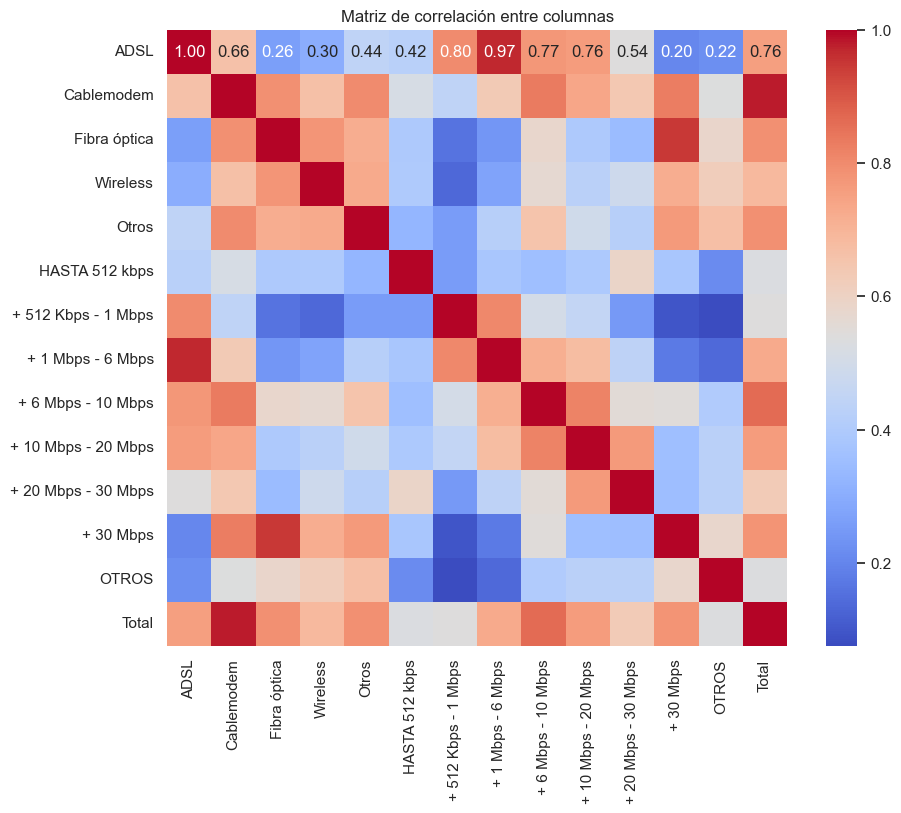

In [25]:
corr = df_accesos[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 
                   'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', 
                   '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre columnas")
plt.show()

#### En esta correlacion encontramos informacion muy valiosa, porque cuando miramos el mapa de calor nos damos cuenta que existen varias relaciones fuertes entre ciertos rangos de conectividad y las tecnologias, dandole un rango de limites de velocidades a cada tecnologia que a la vez define su capacidad y aplicacion en cierto sentido
#### Para el ADSL se le otorga un rango entre 512 Kbps y 20Mbps teniendo su aplicacion mas comun entre 1 y 6 Mbps
#### Para el cablemodem se encuentra entre 6 y +30 Mbps y la fibra optica se aplica desde 30 Mbps en adelante

#### Tambien graficamos los ingresos de la industria del internet en funcion del tiempo, pero no es un grafico de gran utilidad ya que esta en una moneda que posee una alta devaluacion por lo que no se puede evaluar su rendimiento financiero en terminos reales

In [31]:
ingr.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2033,1,1.041350e+08,Ene-Mar 2023


In [32]:
def division(valor):
    nuevo_valor = round(valor/1000, 2)
    return nuevo_valor

ingr['Ingresos (millones de pesos)'] = ingr['Ingresos (miles de pesos)'].apply(division)

In [84]:
ingr.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Ingresos (millones de pesos)
0,2024,1,2.804191e+08,Ene-Mar 2024,280419.12
1,2023,4,1.673760e+08,Oct-Dic 2023,167376.01
2,2023,3,1.331066e+08,Jul-Sept 2023,133106.59
3,2023,2,1.180603e+08,Jun-Mar 2023,118060.28
4,2033,1,1.041350e+08,Ene-Mar 2023,104134.99


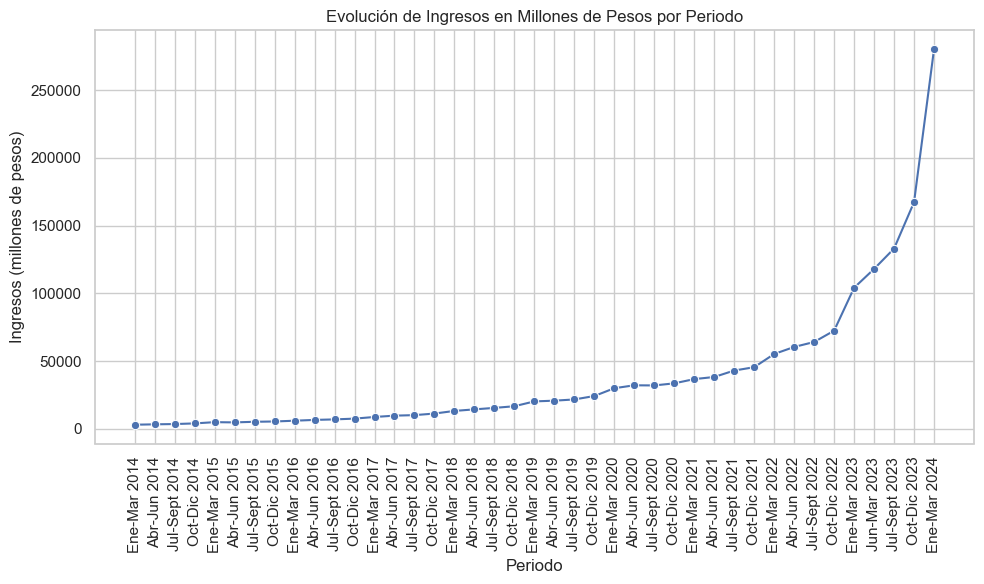

In [88]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Periodo', y='Ingresos (millones de pesos)', data=ingr, marker='o', sort=True)
plt.gca().invert_xaxis()
plt.title('Evolución de Ingresos en Millones de Pesos por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Ingresos (millones de pesos)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()